In this notebook, we are going to perform the ostensive analysis of the dataset:
    
_"New York City Airbnb Open Data"_ , available at:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')

Printing the first examples:

In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Printing the columns of the dataset, as well as their types. This is an important step because depending of the type of 
data that we have, the treatment that we have to perform differs.

In [11]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [22]:
data.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                     40.6475
longitude                                                   -73.9724
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [24]:
data.iloc[0,:2]

id                                    2539
name    Clean & quiet apt home by the park
Name: 0, dtype: object

## Statistical Analysis

Some statistics on the price:

In [52]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [34]:
data.groupby('neighbourhood')['price'].mean()

neighbourhood
Allerton            87.595238
Arden Heights       67.250000
Arrochar           115.000000
Arverne            171.779221
Astoria            117.187778
                      ...    
Windsor Terrace    138.993631
Woodhaven           67.170455
Woodlawn            60.090909
Woodrow            700.000000
Woodside            85.097872
Name: price, Length: 221, dtype: float64

Considering not only the neighbourhood but also the neighbourhood group: 

In [36]:
data.groupby(['neighbourhood_group','neighbourhood'])['price'].mean()

neighbourhood_group  neighbourhood
Bronx                Allerton          87.595238
                     Baychester        75.428571
                     Belmont           77.125000
                     Bronxdale         57.105263
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
                     Woodrow          700.000000
Name: price, Length: 221, dtype: float64

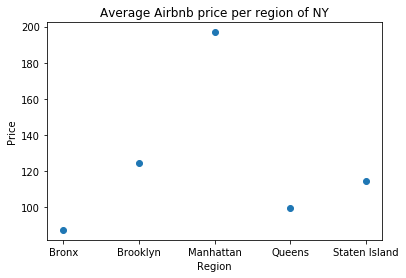

In [41]:
plt.scatter(data.groupby(['neighbourhood_group'])['price'].mean().keys(),data.groupby(['neighbourhood_group'])['price'].mean().values)
plt.title('Average Airbnb price per region of NY')
plt.ylabel('Price')
plt.xlabel('Region')
plt.show()

As expected, we can see that the average price in Manhattan is way higher than in other regions, as it's where most
touristic attractions are.

In [42]:
data.groupby('neighbourhood_group')['host_id'].nunique()

neighbourhood_group
Bronx              789
Brooklyn         15966
Manhattan        16578
Queens            3983
Staten Island      256
Name: host_id, dtype: int64

When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is
higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions
is harder to find owners of two or more houses there.